# Assignment 4: Tests of correlation using the scipy package with citibike data
Andrea Hassler (ah4412)
## Load, read in, and process data

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import sys
import scipy.stats

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Download 2 months of data (one cool, one warm)
!curl https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip > citibike_201502.zip
!curl https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip > citibike_201507.zip

In [ ]:
# Move to PUIdata directory
!mv citibike_201502.zip citibike_201507.zip $PUIDATA

In [ ]:
# Unzip within the PUIdata directory
!unzip $PUIDATA/citibike_201502.zip -d $PUIDATA
!unzip $PUIDATA/citibike_201507.zip -d $PUIDATA

In [14]:
# Read in the files
df1 = pd.read_csv(os.getenv("PUIDATA") + '/201502-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + '/201507-citibike-tripdata.csv')

In [15]:
# Convert to datetime
# Feb data formatted without seconds; July with seconds; converted subsets separately
df1['start'] = pd.to_datetime(df1['starttime'], format='%m/%d/%Y %H:%M')
df2['start'] = pd.to_datetime(df2['starttime'], format='%m/%d/%Y %H:%M:%S')

In [74]:
# Append data frames and check new length is sum of two
df = df1.append(df2, ignore_index=True)
(len(df1) + len(df2)) == len(df)

True

In [75]:
# Subset to necessary columns
df_day = df[['tripduration', 'start']]
df_day.head()

,tripduration,start
0,801,2015-02-01 00:00:00
1,379,2015-02-01 00:00:00
2,2474,2015-02-01 00:01:00
3,818,2015-02-01 00:01:00
4,544,2015-02-01 00:01:00


In [76]:
# Split data into day and night rides by hour
df_day['day'] = (df_day['start'].dt.hour >= 6) & (df_day['start'].dt.hour < 18)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [77]:
# Store tripduration for day and night rides
df_day['dayride'] = df_day['tripduration'][(df_day['day'] == True)]
df_day['nightride'] = df_day['tripduration'][(df_day['day'] == False)]
df_day.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,start,day,dayride,nightride
0,801,2015-02-01 00:00:00,False,NaN,801.0
1,379,2015-02-01 00:00:00,False,NaN,379.0
2,2474,2015-02-01 00:01:00,False,NaN,2474.0
3,818,2015-02-01 00:01:00,False,NaN,818.0
4,544,2015-02-01 00:01:00,False,NaN,544.0


In [78]:
# Drop all irrelevant columns
df_day.drop(df_day.columns.difference(['dayride', 'nightride']), axis = 1, inplace = True)
df_day.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,dayride,nightride
0,NaN,801.0
1,NaN,379.0
2,NaN,2474.0
3,NaN,818.0
4,NaN,544.0


In [79]:
df_day.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,dayride,nightride
count,8.628060e+05,4.198000e+05
mean,9.051143e+02,9.469298e+02
std,6.467160e+03,9.027689e+03
min,6.000000e+01,6.000000e+01
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,5.174309e+06,3.611666e+06


In [80]:
# Drop the NaN values
df_day['dayride'].dropna(inplace= True)
df_day['nightride'].dropna(inplace= True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


## Plot distributions

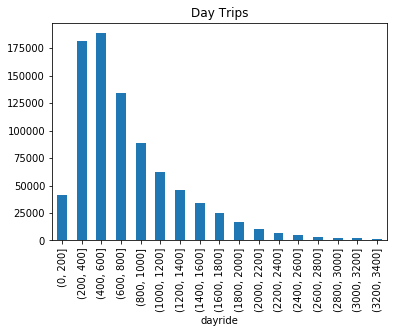

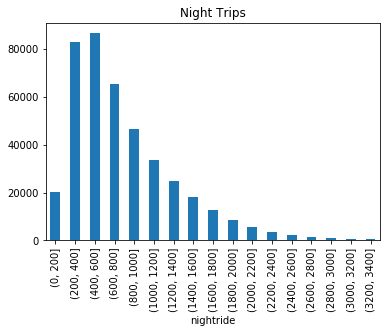

In [64]:
# Plot histograms with pandas
bins = np.arange(0, 3500, 200)
axD = df_day.dayride.groupby(pd.cut(df_day.dayride, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axD.set_title("Day Trips")

axN = df_day.nightride.groupby(pd.cut(df_day.nightride, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axN.set_title("Night Trips");

**Figure 1:** Distribution of trip duration for day rides (upper) and night rides (lower). The distributions look very similar in shape, though counts are about twice as much for day trips. This makes sense, as we expect people to take more day trips than night trips.

              count_nonzero
dayride                    
(0, 200]           0.000184
(200, 400]         0.013660
(400, 600]         0.027264
(600, 800]         0.027618
(800, 1000]        0.019905
(1000, 1200]       0.012650
(1200, 1400]       0.007571
(1400, 1600]       0.004558
(1600, 1800]       0.002967
(1800, 2000]       0.001481
(2000, 2200]       0.000125
(2200, 2400]       0.000424
(2400, 2600]       0.000919
(2600, 2800]       0.000877
(2800, 3000]       0.000672
(3000, 3200]       0.000412
(3200, 3400]       0.000000


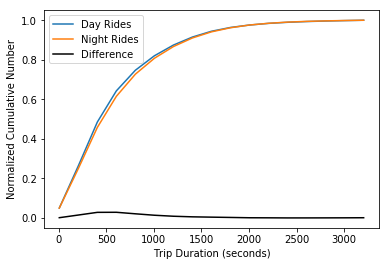

In [81]:
# Plot CDFs
csM=df_day.dayride.groupby(pd.cut(df_day.dayride, bins)).agg([count_nonzero]).cumsum()

csF=df_day.nightride.groupby(pd.cut(df_day.nightride, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Day Rides")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "Night Rides")
pl.plot(bins[:-1] + 5, (csM / csM.max() - csF / csF.max()), 'k-',
        label = "Difference")
pl.xlabel("Trip Duration (seconds)")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

**Figure 2:** Normalized cumulative distribution functions (CDFs) for day rides and night rides. This is the probability of a trip being less than or equal to some amount of seconds for day rides (blue) and night rides (yellow). Differences in the CDFs occur early and do not appear to be large, but this may still be enough to reject the null in the following test.

## Run comparison and correlation tests

### K-S Test to compare two samples
**Null:** The two sample distributions of day rides and night rides come from the same parent distribution.  
**Alternative:** The two sample distributions of day rides and night rides do not come from the same parent distribution.  
**Alpha level:** 0.05

In [82]:
ks = scipy.stats.ks_2samp(df_day.dayride, df_day.nightride)
print (ks)

Ks_2sampResult(statistic=0.026073328476671098, pvalue=2.9795184945172857e-167)


**Interpretation of results:** The KS statistic is $D\approx0.026$ with a p-value of about $2.980e-167$. Since the p-value is less than our alpha level, we reject the null hypothesis that the two samples come from the same parent distribution.

### K-S Test with reduced dataset
Same null and alternative apply but for the two smaller samples. Alpha is still 0.05.

In [83]:
# Reduce dataset by randomly sampling of size to 200 times smaller
df_sm = df_day.sample(frac=0.005, replace=False, random_state=2018)
df_sm.head()

,dayride,nightride
934857,1188.0,NaN
577977,NaN,448.0
730139,NaN,828.0
886542,1549.0,NaN
602449,930.0,NaN


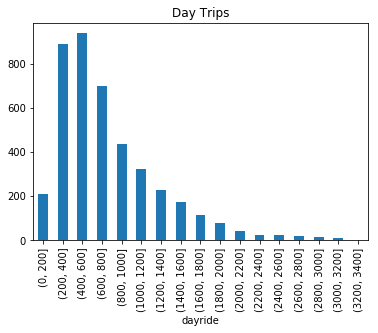

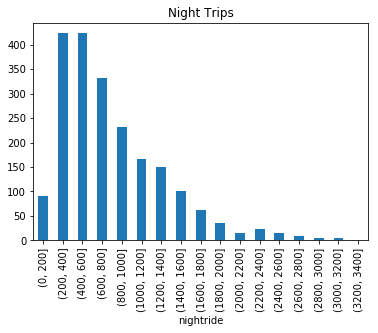

In [84]:
# Histograms
bins = np.arange(0, 3500, 200)
axD = df_sm.dayride.groupby(pd.cut(df_sm.dayride, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axD.set_title("Day Trips")

axN = df_sm.nightride.groupby(pd.cut(df_sm.nightride, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axN.set_title("Night Trips");

**Figure 3:** Distribution of trip durations of day trips (upper) and night trips (lower). The distributions do not appear quite as similar as for the full sample. This makes sense since the sample is much smaller. Once again, there are still about twice as many day trips than night trips.

              count_nonzero
dayride                    
(0, 200]           0.006268
(200, 400]         0.013977
(400, 600]         0.032776
(600, 800]         0.038465
(800, 1000]        0.030864
(1000, 1200]       0.028163
(1200, 1400]       0.009990
(1400, 1600]       0.003223
(1600, 1800]       0.000701
(1800, 2000]       0.002126
(2000, 2200]       0.004620
(2200, 2400]       0.001195
(2400, 2600]       0.003419
(2600, 2800]       0.003004
(2800, 3000]       0.000906
(3000, 3200]       0.000466
(3200, 3400]       0.000000


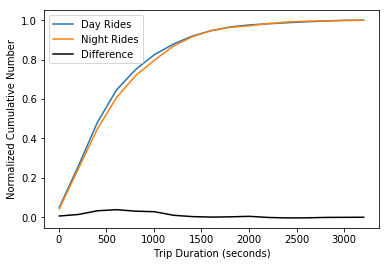

In [85]:
# Plot CDFs
csM=df_sm.dayride.groupby(pd.cut(df_sm.dayride, bins)).agg([count_nonzero]).cumsum()

csF=df_sm.nightride.groupby(pd.cut(df_sm.nightride, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Day Rides")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "Night Rides")
pl.plot(bins[:-1] + 5, (csM / csM.max() - csF / csF.max()), 'k-',
        label = "Difference")
pl.xlabel("Trip Duration (seconds)")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

**Figure 4:** Normalized cumulative distribution functions (CDFs) for day rides and night rides for the smaller samples. This is the probability of a trip being less than or equal to some amount of seconds for day rides (blue) and night rides (yellow). Differences in the CDFs occur early and appear larger than before, which again makes sense since the samples are smaller and may be more variable than the larger samples.

In [ ]:
# Conduct test on reduced sample
ks_sm = scipy.stats.ks_2samp(df_sm.dayride, df_sm.nightride)
print(ks_sm)

**Interpretation of results:** The KS statistic is $D \approx 0.341$ with a p-value so small that Python rounds it to zero. Once again, at alpha level 0.05, we reject the null that the two distributions come from the same parent distribution.

## Pearson's Correlation
Our data samples cannot be used for this test; they are both unpaired and not the same length. In the original data frame, each observation (trip) only has one trip duration and can only be either day or night. For correlation, day and night need to be paired somehow. Since the data only covers 2 months, the best pairing is probably achieved by averaging over days. This will also result in data columns of the same length. This test assumes that both samples are normally distributed.  

  
**Null:** The sample of average day trip durations and the sample of average night trip durations are non-correlated.  
**Alternative:** The sample of average day trip durations and the sample of average night trip durations are correlated.  
**Alpha level:** 0.05

In [87]:
# Subset original data frame
df.drop(df.columns.difference(['tripduration', 'start']), axis = 1, inplace = True)
df.head()

,tripduration,start
0,801,2015-02-01 00:00:00
1,379,2015-02-01 00:00:00
2,2474,2015-02-01 00:01:00
3,818,2015-02-01 00:01:00
4,544,2015-02-01 00:01:00


In [88]:
# Split data into day and night rides by hour
df['day'] = (df['start'].dt.hour >= 6) & (df['start'].dt.hour < 18)
df.head()

,tripduration,start,day
0,801,2015-02-01 00:00:00,False
1,379,2015-02-01 00:00:00,False
2,2474,2015-02-01 00:01:00,False
3,818,2015-02-01 00:01:00,False
4,544,2015-02-01 00:01:00,False


In [89]:
# Store tripduration for day and night rides
df['dayride'] = df['tripduration'][(df['day'] == True)]
df['nightride'] = df['tripduration'][(df['day'] == False)]
df.head()

,tripduration,start,day,dayride,nightride
0,801,2015-02-01 00:00:00,False,NaN,801.0
1,379,2015-02-01 00:00:00,False,NaN,379.0
2,2474,2015-02-01 00:01:00,False,NaN,2474.0
3,818,2015-02-01 00:01:00,False,NaN,818.0
4,544,2015-02-01 00:01:00,False,NaN,544.0


In [90]:
# Drop unneeded columns and change start to date only
df.drop(df.columns.difference(['start', 'dayride', 'nightride']), axis = 1, inplace = True)
df['start'] = df.start.dt.date
df.head()

,start,dayride,nightride
0,2015-02-01,NaN,801.0
1,2015-02-01,NaN,379.0
2,2015-02-01,NaN,2474.0
3,2015-02-01,NaN,818.0
4,2015-02-01,NaN,544.0


In [91]:
# Group by date of start and take mean of dayride and nightride
df = df.groupby(['start']).mean()
df.head()

,dayride,nightride
start,,
2015-02-01,644.731241,615.891156
2015-02-02,888.974041,970.169284
2015-02-03,782.631410,737.805998
2015-02-04,698.579824,695.484154
2015-02-05,626.515152,614.761359


In [92]:
# Conduct the test
scipy.stats.pearsonr(df.dayride, df.nightride)

(0.88812104797625591, 6.7275173414156718e-21)

**Interpretation of results:** The Pearson correlation coefficient is $r \approx 0.888$ with a p-value of $\approx 6.728e-21$. The correlation coefficient implies a strong positive relationship between the trip durations of day and night rides. At alpha level 0.05, we reject the null that the two samples are non-correlated.

### Spearman's Correlation
Unlike Pearson's Correlation, this test does not rely on the parametric assumption that both samples are normally distributed.
  
**Null:** The sample of average day trip durations is not monotonically related to the sample of average night trip durations.  
**Alternative:** The sample of average day trip durations is monotonically related the sample of average night trip durations.  
**Alpha level:** 0.05

In [93]:
# Conduct the test
scipy.stats.spearmanr(df.dayride, df.nightride)

SpearmanrResult(correlation=0.89818819403857386, pvalue=5.2710883266570404e-22)

**Interpretation of results:** The Pearson correlation coefficient is $r \approx 0.898$ with a p-value of $\approx 5.271e-22$. The correlation coefficient implies a strong positive, monotonic relationship between the trip durations of day and night rides. At alpha level 0.05, we reject the null that the two samples are not monotonically related. This test agrees with the results of the Pearson correlation.